## **Implementation of Perceptron**

**A perceptron is a basic unit of a neural network used for binary classification tasks. It takes multiple input values, applies weights to these inputs, sums them up, adds a bias term, and then produces an output based on whether the sum is greater than a certain threshold. The output is typically a binary decision, like 0 or 1.**

The activation is calculated as the weighted sum of the input features plus the bias:
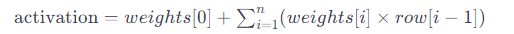



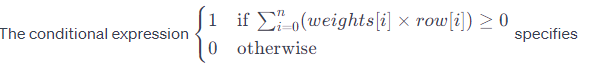

In [ ]:
def predict(row, weights):
  activation = weights[0]  ## Storing Bias
  for i in range(len(row)-1):  ## For Loop
    activation += weights[i+1] * row[i]
  return 1.0 if activation >=0 else 0

### **Loading Data**

In [ ]:
import pandas as pd
df = pd.read_csv(
    'https://raw.githubusercontent.com/infiniaclub/NeuralNetworkDataset/main/sonar%20dataset.csv').values
print(f"Dataset : \n{df}")

Dataset : 
[[ 2.7810836   2.550537    0.        ]
 [ 1.46548937  2.36212508  0.        ]
 [ 3.39656169  4.40029353  0.        ]
 [ 1.38807019  1.85022032  0.        ]
 [ 3.06407232  3.00530597  0.        ]
 [ 7.62753121  2.75926224  1.        ]
 [ 5.33244125  2.08862677  1.        ]
 [ 6.92259672  1.77106367  1.        ]
 [ 8.67541865 -0.24206865  1.        ]
 [ 7.67375647  3.50856301  1.        ]]


### **Initialize the weights and pass each rows for prediction**

In [ ]:
correct_predictions = 0
weights = [-0.1, 0.20, -0.23]
for row in df:
 prediction = predict(row, weights)
 if prediction == row[-1]:
        correct_predictions += 1
 print(f"Actual: {round(row[-1])}  Predicted: {round(prediction)}")
accuracy = (correct_predictions / len(df))*100
print(f"Accuracy is : {accuracy}%")

Actual: 0  Predicted: 0
Actual: 0  Predicted: 0
Actual: 0  Predicted: 0
Actual: 0  Predicted: 0
Actual: 0  Predicted: 0
Actual: 1  Predicted: 1
Actual: 1  Predicted: 1
Actual: 1  Predicted: 1
Actual: 1  Predicted: 1
Actual: 1  Predicted: 1
Accuracy is : 100.0%


## **Training Network Weights**
***Estimate Perceptron weights using stochastic gradient descent***

Stochastic gradient descent requires two parameters:

- Learning Rate: Used to limit the amount each weight is corrected each time it is updated.
- Epochs: The number of times to run through the training data while updating the weight.

**There are 3 loops we need to perform in the function:**
1. Loop over each epoch.
2. Loop over each row in the training data for an epoch.
3. Loop over each weight and update it for a row in an epoch.

**We are constructing Single Layer Preceptron for AND Gate**

In [ ]:
def training_weights(train_data, learning_rate, n_epoch):
  weights = [00 for i in range(len(train_data[0]))]
  for epoch in range(n_epoch):          ## Loop for number of epoch
    sum_error = 0.0
    for row in train_data:       ## Loop for each row in training
      prediction = predict(row, weights)
      error = row[-1] - prediction
      sum_error += error**2             ## Mean Square Error
      weights[0] += learning_rate * error  ## Updating Bias
      for i in range(len(row)-1):       ## Loop for each weight update for row
        weights[i+1] += learning_rate * error * row[i] ## Updating Weights
    print(f">epoch= {epoch}, learning_rate = {learning_rate}, MSE= {sum_error}")
  return weights

In [1]:
logical_and_dataset = pd.read_csv("https://raw.githubusercontent.com/infiniaclub/NeuralNetworkDataset/main/logical_and.csv").values
learning_rate = 0.01  ## 1% Learning Rate
n_epoch = 25    ## Change n_epoch or learning_rate to see effect on prediction
weights = training_weights(logical_and_dataset, learning_rate, n_epoch)
print(f"\n Computed Bias : {round(weights[0],3)} \n Computed Weights_i: {weights[1:]} \n")

NameError: name 'pd' is not defined

**Predicting Using the Computed Weights**

In [ ]:
for row in logical_and_dataset:
 prediction = predict(row, weights)
 print(f"Actual: {round(row[-1])}  Predicted: {round(prediction)}")

Actual: 1  Predicted: 1
Actual: 0  Predicted: 0
Actual: 0  Predicted: 0
Actual: 0  Predicted: 0


### **Example 1**

**Features**

- Age in Year
- Experince in Year

**Target Class**
- 1 means Hired
- 0 means Rejected

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/infiniaclub/NeuralNetworkDataset/main/job.csv')
df.head(5)
dataset = df.values
l_rate = 0.1
epoch = 25
weights = training_weights(dataset, l_rate, epoch)
print(f"\n Computed Bias : {round(weights[0],3)} \n Computed Weights_i: {weights[1:]} \n")
for row in dataset:
  prediction = predict(row, weights)
  print(f"Actual: {round(row[-1])}  Predicted: {round(prediction)}")

>epoch= 0, learning_rate = 0.1, MSE= 8.0
>epoch= 1, learning_rate = 0.1, MSE= 7.0
>epoch= 2, learning_rate = 0.1, MSE= 9.0
>epoch= 3, learning_rate = 0.1, MSE= 9.0
>epoch= 4, learning_rate = 0.1, MSE= 9.0
>epoch= 5, learning_rate = 0.1, MSE= 9.0
>epoch= 6, learning_rate = 0.1, MSE= 9.0
>epoch= 7, learning_rate = 0.1, MSE= 9.0
>epoch= 8, learning_rate = 0.1, MSE= 9.0
>epoch= 9, learning_rate = 0.1, MSE= 9.0
>epoch= 10, learning_rate = 0.1, MSE= 9.0
>epoch= 11, learning_rate = 0.1, MSE= 9.0
>epoch= 12, learning_rate = 0.1, MSE= 9.0
>epoch= 13, learning_rate = 0.1, MSE= 9.0
>epoch= 14, learning_rate = 0.1, MSE= 9.0
>epoch= 15, learning_rate = 0.1, MSE= 9.0
>epoch= 16, learning_rate = 0.1, MSE= 9.0
>epoch= 17, learning_rate = 0.1, MSE= 9.0
>epoch= 18, learning_rate = 0.1, MSE= 9.0
>epoch= 19, learning_rate = 0.1, MSE= 9.0
>epoch= 20, learning_rate = 0.1, MSE= 9.0
>epoch= 21, learning_rate = 0.1, MSE= 9.0
>epoch= 22, learning_rate = 0.1, MSE= 9.0
>epoch= 23, learning_rate = 0.1, MSE= 1.0
>e